In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.4f}'.format

In [2]:
coins = pd.read_csv("../data/coins.csv", index_col=[0], parse_dates=[0])
coins.columns = [col.replace('-USD', '') for col in coins.columns]
columns_no_na = coins.iloc[-1].isna()
columns_no_na = columns_no_na.iloc[columns_no_na.to_numpy().nonzero()].index

coins = coins.drop(columns=columns_no_na)
coins = coins.drop(columns=['AUD', 'UNI', 'VIC', 'APE'])

coins

,AAVE,ACA,ACH,ADA,ADX,AEUR,AGIX,AGLD,AION,AKRO,...,XTZ,XVG,XVS,YFI,YFII,YGG,ZEC,ZEN,ZIL,ZRX
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,112.1139,0.1108,0.0233,0.6335,0.2081,1.1100,0.3432,1.4292,0.0016,0.0067,...,1.1126,0.0040,12.5998,8399.7402,884.2144,0.4735,31.7713,11.2188,0.0271,0.3623
2023-12-28,118.9683,0.1020,0.0218,0.6174,0.2009,1.0984,0.3258,1.2576,0.0016,0.0065,...,1.0554,0.0039,12.1604,8316.0010,904.9813,0.4500,31.9067,11.0396,0.0258,0.3727
2023-12-29,112.4268,0.1144,0.0217,0.6085,0.2019,1.1080,0.3243,1.3025,0.0016,0.0064,...,1.0311,0.0038,12.0235,8226.2559,918.0396,0.4329,28.6863,9.6433,0.0252,0.3667


In [3]:
risk_free_return = 0.017
risk_free_risk = 0
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

In [4]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*365
    summary.Risk = summary.Risk * np.sqrt(365)
    return summary

In [5]:
ret = coins.pct_change()
ret

,AAVE,ACA,ACH,ADA,ADX,AEUR,AGIX,AGLD,AION,AKRO,...,XTZ,XVG,XVS,YFI,YFII,YGG,ZEC,ZEN,ZIL,ZRX
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0896,0.0004,0.0150,0.0406,0.0259,0.0049,-0.0317,-0.0183,0.0135,0.0063,...,0.0633,0.0102,-0.0507,0.0297,0.0311,-0.0210,0.0466,0.0110,-0.0144,0.0081
2023-12-28,0.0611,-0.0799,-0.0625,-0.0254,-0.0345,-0.0104,-0.0506,-0.1200,-0.0127,-0.0350,...,-0.0514,-0.0071,-0.0349,-0.0100,0.0235,-0.0497,0.0043,-0.0160,-0.0491,0.0287
2023-12-29,-0.0550,0.1217,-0.0042,-0.0145,0.0051,0.0087,-0.0048,0.0356,0.0128,-0.0227,...,-0.0230,-0.0472,-0.0113,-0.0108,0.0144,-0.0381,-0.1009,-0.1265,-0.0213,-0.0160


In [6]:
summary = ann_risk_return(ret)
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAVE,32.3121,56.5610,0.5710
ACA,400.6942,592.1107,0.6767
ACH,1.7328,2.2080,0.7771
ADA,1.2420,1.3326,0.9193
ADX,0.8125,1.5672,0.5076
...,...,...,...
YGG,0.7782,1.6640,0.4575
ZEC,0.2187,1.0803,0.1867
ZEN,0.5769,1.2352,0.4533
ZIL,0.5597,1.3378,0.4057


In [7]:
COV = ret.cov()*365
COV

,AAVE,ACA,ACH,ADA,ADX,AEUR,AGIX,AGLD,AION,AKRO,...,XTZ,XVG,XVS,YFI,YFII,YGG,ZEC,ZEN,ZIL,ZRX
AAVE,3199.1457,-5.7677,-0.1258,0.7699,1.2816,-0.0139,0.9160,0.6730,0.0988,2.4892,...,1.0971,0.8087,0.9154,-2.4134,-4.4802,0.7941,-1.4093,1.0518,1.6347,-0.2252
ACA,-5.7677,350595.0647,-10.0142,-1.7410,-8.0624,-0.2439,-10.0831,8.1009,-18.5112,-1.2257,...,-0.0001,-1.4880,-7.5589,-4.5536,-4.8115,-0.8274,-9.7599,-7.7211,-3.7583,-4.4566
ACH,-0.1258,-10.0142,4.8753,0.5052,0.5729,-0.0416,0.6154,0.5741,0.6859,0.7144,...,0.6394,0.6322,0.6660,0.6180,0.7396,0.5542,0.5813,0.6955,0.6635,0.7047
ADA,0.7699,-1.7410,0.5052,1.7758,0.7163,-1.6522,0.7518,0.5997,0.9127,0.6967,...,0.8124,1.0108,0.6535,0.6261,0.6539,0.6915,0.7865,0.7522,0.8460,0.8275
ADX,1.2816,-8.0624,0.5729,0.7163,2.4561,-0.2835,0.7048,0.6995,1.0682,0.7346,...,0.6738,0.7942,0.6782,0.7053,0.5214,0.6558,0.6619,0.6928,0.8003,0.7996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YGG,0.7941,-0.8274,0.5542,0.6915,0.6558,-0.0877,0.8303,1.0884,0.7498,0.7148,...,0.7276,0.6871,0.7682,0.6856,0.5307,2.7689,0.6350,0.8380,0.8426,0.8175
ZEC,-1.4093,-9.7599,0.5813,0.7865,0.6619,-0.4541,0.6583,0.6568,0.9362,0.7461,...,0.7100,0.8147,0.7497,0.7015,0.7198,0.6350,1.1670,0.8313,0.8218,0.7778
ZEN,1.0518,-7.7211,0.6955,0.7522,0.6928,-0.2549,1.0124,0.8479,1.0059,0.9243,...,0.7194,0.8411,0.9122,0.8218,0.7742,0.8380,0.8313,1.5257,0.8390,0.8281
ZIL,1.6347,-3.7583,0.6635,0.8460,0.8003,-0.3992,0.8825,0.8050,1.1073,0.8620,...,0.8014,0.9372,0.8735,0.8003,0.7615,0.8426,0.8218,0.8390,1.7896,0.9428


In [8]:
summary["SystRisk_var"] = COV.iloc[:, -1]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary["beta"] = summary.SystRisk_var / summary.loc["BTC", "SystRisk_var"]
summary["capm_ret"] = rf[0] + (summary.loc["BTC", "Return"] - rf[0]) * summary.beta
summary["alpha"] = summary.Return - summary.capm_ret
# summary["Er"] = rf[0] + summary['beta'] * (summary.loc["BTC", "Return"])

summary = summary[summary['beta'] >= 0]

summary

,Return,Risk,Sharpe,SystRisk_var,TotalRisk_var,UnsystRisk_var,beta,capm_ret,alpha
ACH,1.7328,2.2080,0.7771,0.7047,4.8753,4.1706,1.3881,1.0194,0.7134
ADA,1.2420,1.3326,0.9193,0.8275,1.7758,0.9484,1.6298,1.1940,0.0480
ADX,0.8125,1.5672,0.5076,0.7996,2.4561,1.6565,1.5749,1.1544,-0.3419
AGIX,1.5663,2.6590,0.5827,0.8359,7.0701,6.2342,1.6465,1.2061,0.3602
AGLD,1.1802,1.7934,0.6486,0.7644,3.2163,2.4519,1.5057,1.1044,0.0758
...,...,...,...,...,...,...,...,...,...
YGG,0.7782,1.6640,0.4575,0.8175,2.7689,1.9514,1.6103,1.1799,-0.4017
ZEC,0.2187,1.0803,0.1867,0.7778,1.1670,0.3892,1.5321,1.1234,-0.9048
ZEN,0.5769,1.2352,0.4533,0.8281,1.5257,0.6976,1.6310,1.1949,-0.6180
ZIL,0.5597,1.3378,0.4057,0.9428,1.7896,0.8469,1.8570,1.3581,-0.7984


In [9]:
summary.loc['BETA']

Return           -0.8311
Risk              1.2816
Sharpe           -0.6617
SystRisk_var      0.5618
TotalRisk_var     1.6425
UnsystRisk_var    1.0807
beta              1.1066
capm_ret          0.8162
alpha            -1.6472
Name: BETA, dtype: float64

In [13]:
ret

,AAVE,ACA,ACH,ADA,ADX,AEUR,AGIX,AGLD,AION,AKRO,...,XTZ,XVG,XVS,YFI,YFII,YGG,ZEC,ZEN,ZIL,ZRX
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0896,0.0004,0.0150,0.0406,0.0259,0.0049,-0.0317,-0.0183,0.0135,0.0063,...,0.0633,0.0102,-0.0507,0.0297,0.0311,-0.0210,0.0466,0.0110,-0.0144,0.0081
2023-12-28,0.0611,-0.0799,-0.0625,-0.0254,-0.0345,-0.0104,-0.0506,-0.1200,-0.0127,-0.0350,...,-0.0514,-0.0071,-0.0349,-0.0100,0.0235,-0.0497,0.0043,-0.0160,-0.0491,0.0287
2023-12-29,-0.0550,0.1217,-0.0042,-0.0145,0.0051,0.0087,-0.0048,0.0356,0.0128,-0.0227,...,-0.0230,-0.0472,-0.0113,-0.0108,0.0144,-0.0381,-0.1009,-0.1265,-0.0213,-0.0160


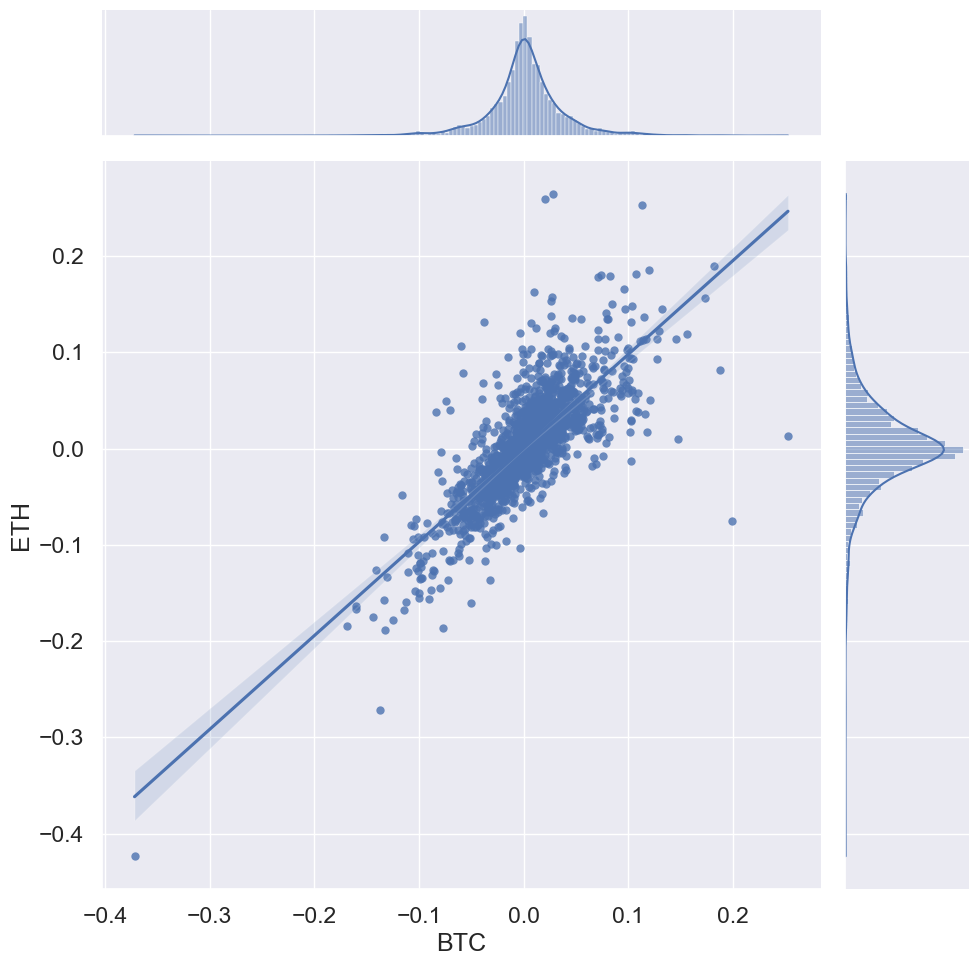

In [10]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "BTC", y = "ETH", height = 10, kind = "reg")
plt.show()

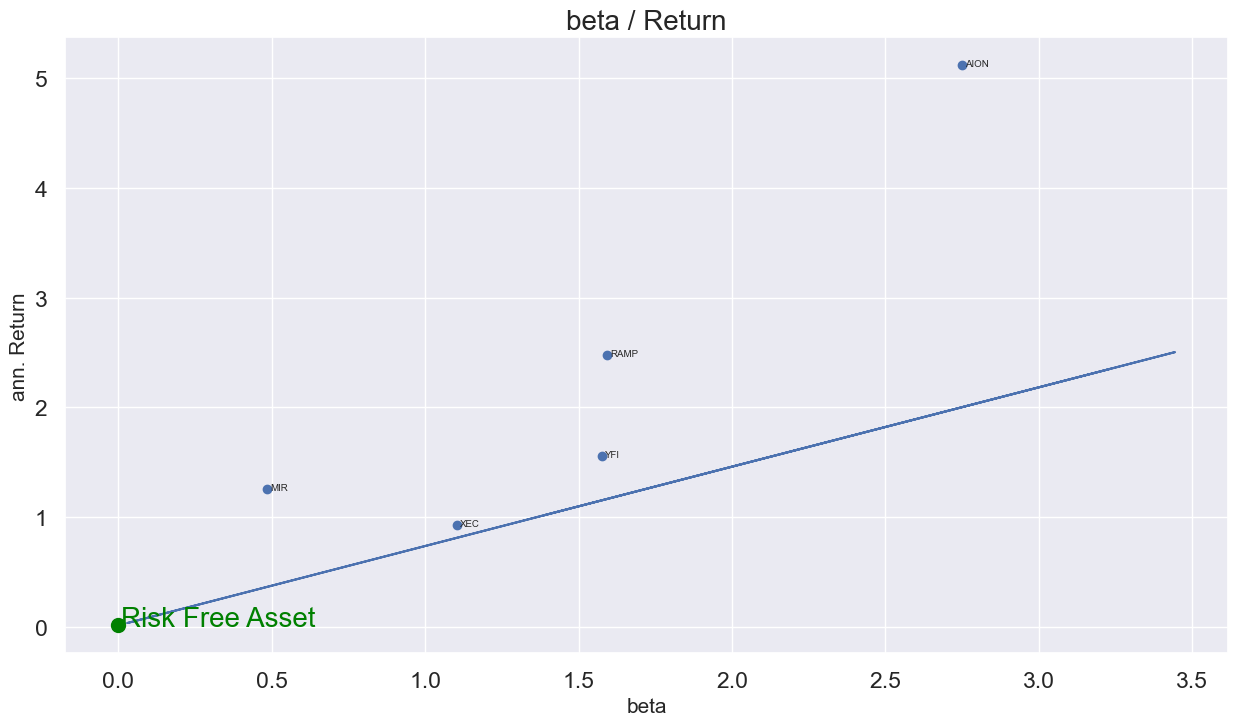

In [11]:
summary_sample = summary[summary['capm_ret'] <= summary['Return']].sample(5)
plt.figure(figsize = (15, 8))
plt.scatter(summary_sample.beta, summary_sample.Return)
for i in summary_sample.index:
    plt.annotate(i, xy=(summary_sample.loc[i, "beta"]+0.01, summary_sample.loc[i, "Return"]-0.01), size = 7)
# plt.plot([rf[1], summary.loc["BTC", "beta"]], [rf[0],rf[0] + summary.loc["BTC", "beta"]*(summary.loc["BTC", "Return"] - rf[0])])
plt.plot(summary['beta'], summary['capm_ret'])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

In [12]:
summary_sample.index

Index(['RAMP', 'AION', 'XEC', 'MIR', 'YFI'], dtype='object')